In [2]:
import numpy as np
import pandas as pd      

In [4]:
import os

for dirname, _, filenames in os.walk(r'C:\Users\admin\Downloads\brain_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\annotations_all.json
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\annotations_test.json
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y701.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y702.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y703.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y704.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y705.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y706.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y707.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y708.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y709.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y710.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y711.jpg
C:\Users\admin\Downloads\brain_dataset\Br35H-Mask-RCNN\TEST\y712.jpg
C:\Users\admin

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
from tensorflow.keras import models,layers

In [12]:
import os

image_dir = r'C:\Users\admin\Downloads\brain_dataset'

print("Contents of the directory:")
print(os.listdir(image_dir))

no_folder_path = os.path.join(image_dir, 'no')
yes_folder_path = os.path.join(image_dir, 'yes')

if not os.path.exists(no_folder_path):
    print(f"The 'no' folder does not exist in {image_dir}")
else:
    no_tumor_images = os.listdir(no_folder_path)
    print('The length of no tumor images is', len(no_tumor_images))

if not os.path.exists(yes_folder_path):
    print(f"The 'yes' folder does not exist in {image_dir}")
else:
    yes_tumor_images = os.listdir(yes_folder_path)
    print('The length of yes tumor images is', len(yes_tumor_images))


Contents of the directory:
['Br35H-Mask-RCNN', 'no', 'pred', 'yes']
The length of no tumor images is 1500
The length of yes tumor images is 1500


In [13]:

dataset=[]
label=[]

In [15]:
from PIL import Image
import cv2
import numpy as np


for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image_path = os.path.join(image_dir, 'no', image_name)

        if os.path.exists(image_path):
            image = cv2.imread(image_path)

            if image is not None:
                image = Image.fromarray(image, 'RGB')
                image = image.resize((128, 128))

                dataset.append(np.array(image))

                label.append(0)
            else:
                print(f"Error loading image: {image_path}")
        else:
            print(f"Image not found: {image_path}")


In [17]:
from PIL import Image
import cv2
import numpy as np

for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image_path = os.path.join(image_dir, 'yes', image_name)

        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                image = Image.fromarray(image, 'RGB')
                image = image.resize((128, 128))

                dataset.append(np.array(image))

                label.append(1)
            else:
                print(f"Error loading image: {image_path}")
        else:
            print(f"Image not found: {image_path}")


In [18]:

dataset=np.array(dataset)
label = np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


In [19]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=.2)

In [20]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

In [21]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1,activation='sigmoid')
])
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [22]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
75/75 [==============================] - 14s 174ms/step - loss: 0.4986 - accuracy: 0.7721
Epoch 2/5
75/75 [==============================] - 13s 168ms/step - loss: 0.2645 - accuracy: 0.9004
Epoch 3/5
75/75 [==============================] - 13s 171ms/step - loss: 0.1230 - accuracy: 0.9654
Epoch 4/5
75/75 [==============================] - 13s 169ms/step - loss: 0.0769 - accuracy: 0.9837
Epoch 5/5
75/75 [==============================] - 13s 177ms/step - loss: 0.0432 - accuracy: 0.9887


In [23]:
cnn.evaluate(x_test,y_test)

19/19 [==============================] - 1s 30ms/step - loss: 0.0843 - accuracy: 0.9750


[0.08428765088319778, 0.9750000238418579]

In [24]:
y_pred=cnn.predict(x_test)
y_pred = cnn.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print('classification Report\n',classification_report(y_test,y_pred))

19/19 [==============================] - 1s 30ms/step
classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       294
           1       0.98      0.97      0.98       306

    accuracy                           0.97       600
   macro avg       0.97      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



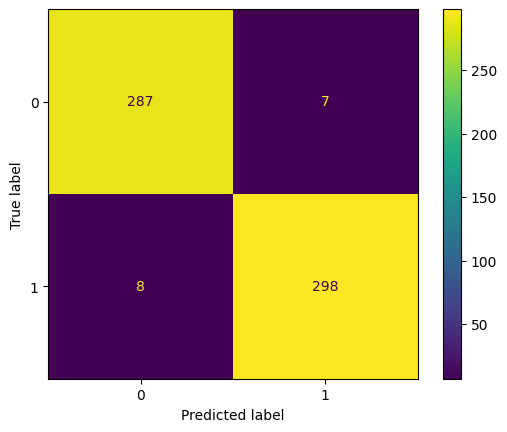

In [25]:
cm = confusion_matrix(y_test, y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [26]:
cnn.save('brain tumor detection.h5')

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model = load_model('C:/Users/admin/Documents/Brain_Tumor/brain tumor detection.h5')


In [31]:
def make_prediction(img):
    img=cv2.imread(img)
    img=Image.fromarray(img)
    img=img.resize((128,128))
    img=np.array(img)
    input_img = np.expand_dims(img, axis=0)
    plt.imshow(img)
    plt.show()
    res = model.predict(input_img)
    if res:
        print("Tumor Detected")
    else:
        print("No Tumor")


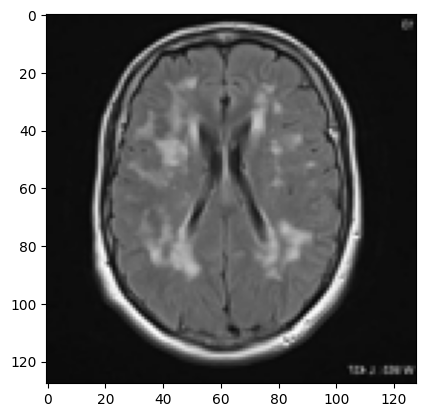

1/1 [==============================] - 0s 76ms/step
No Tumor


In [33]:
make_prediction(r'C:\Users\admin\Downloads\brain_dataset\no\no961.jpg')